Частина 1

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

Частина 2

В цій частині ми знову будемо працювати з датасетом fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
# Частина 1
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Перетворення розмірів зображень
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Нормалізація значень пікселів
train_images, test_images = train_images / 255.0, test_images / 255.0

2024-07-06 16:21:07.778276: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Побудова моделі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.7467 - loss: 0.6992 - val_accuracy: 0.8626 - val_loss: 0.3785
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8810 - loss: 0.3256 - val_accuracy: 0.8830 - val_loss: 0.3172
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9008 - loss: 0.2726 - val_accuracy: 0.8913 - val_loss: 0.2967
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9098 - loss: 0.2425 - val_accuracy: 0.8975 - val_loss: 0.2935
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9203 - loss: 0.2172 - val_accuracy: 0.8990 - val_loss: 0.2848
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9251 - loss: 0.1968 - val_accuracy: 0.9041 - val_loss: 0.2739
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9347 - loss: 0.1767 - val_accuracy: 0.9044 - val_loss: 0.2788
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9404 -

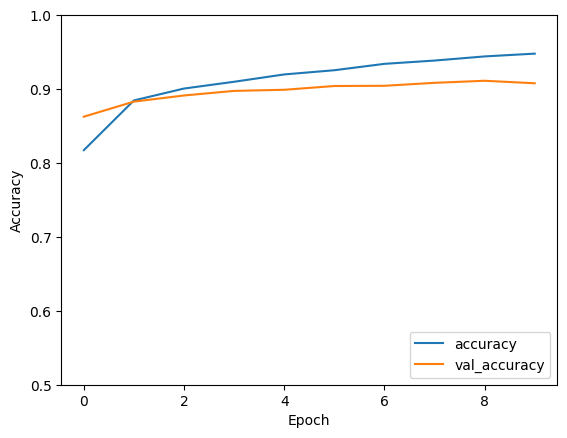

In [3]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Оцінка моделі
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 504s 268ms/step - accuracy: 0.7600 - loss: 0.7012 - val_accuracy: 0.8415 - val_loss: 0.4389
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 437s 233ms/step - accuracy: 0.8449 - loss: 0.4240 - val_accuracy: 0.8449 - val_loss: 0.4299
313/313 - 68s - 216ms/step - accuracy: 0.8449 - loss: 0.4299
0.8449000120162964


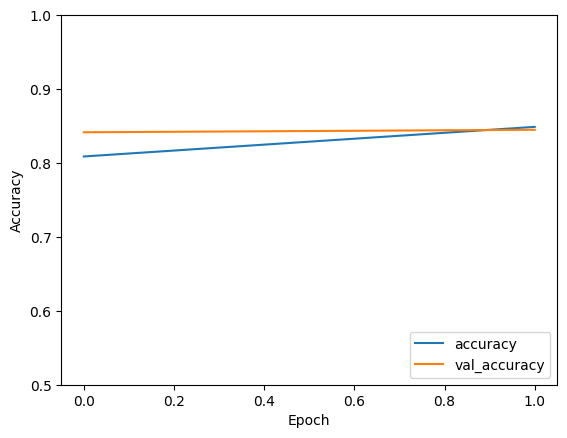

In [8]:
# Частина 2
# Використання VGG16 як Згорткової Основи
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Змінюємо розмір зображень до 32x32 пікселів
train_images_resized = tf.image.resize(train_images, (32, 32))
test_images_resized = tf.image.resize(test_images, (32, 32))

# Конвертуємо чорно-білі зображення до трьохканальних
train_images_rgb = tf.image.grayscale_to_rgb(train_images_resized)
test_images_rgb = tf.image.grayscale_to_rgb(test_images_resized)

# Завантаження попередньо навченого VGG16 без верхніх шарів
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Додавання власних шарів
x = Flatten()(vgg16_base.output)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Повна модель
model_vgg16 = Model(inputs=vgg16_base.input, outputs=output)

# Заморожування шарів VGG16
for layer in vgg16_base.layers:
    layer.trainable = False

model_vgg16.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg16.summary()

# Навчання моделі
history_vgg16 = model_vgg16.fit(train_images_rgb, train_labels, epochs=2, validation_data=(test_images_rgb, test_labels))

# Оцінка моделі
plt.plot(history_vgg16.history['accuracy'], label='accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_vgg16, test_acc_vgg16 = model_vgg16.evaluate(test_images_rgb, test_labels, verbose=2)
print(test_acc_vgg16)

Висновок: 

1. Багатошарова мережа (MLP) з попередньої домашньої роботи:
Точність: 0.89

Показала досить високий рівень точності для завдання класифікації на датасеті Fashion MNIST. Це свідчить про те, що навіть прості архітектури можуть бути ефективними для таких задач, хоча й мають обмеження в здатності розпізнавати складніші шаблони у зображеннях.

2. Згорткова Нейронна Мережа (CNN)
Точність: 0.90

Висновки: Згорткова нейронна мережа показала покращену точність у порівнянні з багатошаровим перцептроном. Впринципі досить очікувано, оскільки CNN спеціально розроблені для обробки зображень і здатні виявляти складні візуальні патерни через згорткові шари.

3. Модель на Основі VGG16
Точність: 0.84

Висновки: Модель на основі VGG16 показала нижчу точність, ніж згорткова нейронна мережа і багатошаровий перцептрон. Це може бути через те, що зміна розміру зображень до 32x32 могла негативно вплинути на здатність моделі виявляти деталі, оскільки оригінальні зображення мають розмір 28x28, також заморожування всіх шарів VGG16 могло обмежити здатність моделі адаптуватися до специфічних характеристик датасету Fashion MNIST. І на кінець можливо використані неоптимальні гіперпараметри...

